In [0]:
import pandas as pd
import numpy as np
import string
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from tqdm import tqdm

import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
# from gensim.models import Word2Vec
# from gensim.models import KeyedVectors
import pickle

import os

from collections import Counter
from scipy.sparse import hstack

from prettytable import PrettyTable
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')
root_path = '/content/gdrive/My Drive/IRE_Major_Project/'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
data = pd.read_csv(root_path+'preprocessed.csv')

In [4]:
data.head()

,id,tweet,new_tweet,user_mentions,n_hash_tags,n_urls,n_emojis,subtask_a,subtask_b,subtask_c,original_tweet_length,new_tweet_length
0,86426,@USER She should ask a few native Americans wh...,she ask native americans their take be,1,0,0,0,OFF,UNT,NaN,14,7
1,90194,@USER @USER Go home you’re drunk!!! @USER #MAG...,go home you drink maga trump2020,3,2,1,1,OFF,TIN,IND,11,6
2,16820,Amazon is investigating Chinese employees who ...,amazon investigate chinese employees sell inte...,0,5,1,0,NOT,NaN,NaN,27,19
3,62688,"@USER Someone should'veTaken"" this piece of sh...",someone should vetaken piece shit volcano,1,0,0,1,OFF,UNT,NaN,11,6
4,43605,@USER @USER Obama wanted liberals &amp; illega...,obama want liberals amp illegals move red state,2,0,0,0,NOT,NaN,NaN,12,8


In [0]:
data.drop(columns = ['subtask_b' , 'subtask_c'] , inplace = True)

# Splitting Data: Train and Test


In [6]:
data['subtask_a'].value_counts()

NOT    8840
OFF    4400
Name: subtask_a, dtype: int64

In [7]:
Y = data['subtask_a']
X = data.drop(['subtask_a','id'],axis=1)
print("Shape of X: ",X.shape)
print("Shape of Y: ",Y.shape)

Shape of X:  (13240, 8)
Shape of Y:  (13240,)


#### Observation: 
We see that the dataset is clearly imbalanced with NOT OFFENSIVE tweets being the majority class.


In [8]:
#separating data into train and test
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.30,stratify=Y,random_state=42)
print("Shape of X_train: ", X_train.shape)
print("Shape of Y_train: ",Y_train.shape)
print("Shape of X_test: ",X_test.shape)
print("Shape of Y_test: ",Y_test.shape)

Shape of X_train:  (9268, 8)
Shape of Y_train:  (9268,)
Shape of X_test:  (3972, 8)
Shape of Y_test:  (3972,)


In [9]:
X_train['new_tweet'].head()

8902     1965 immigration act work exactly liberals hop...
10197                     interest you your state illinois
6956     people tire virtue signal wealthy liberals nev...
9853     i think you say write intelligent commentary h...
11952           she biggest thing she fail everywhere else
Name: new_tweet, dtype: object

#### Change the mapping of the label column to binary


In [0]:
Y_train = Y_train.map(dict(OFF=1, NOT=0))
Y_test = Y_test.map(dict(OFF=1, NOT=0))

In [11]:
# with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
#     print(X_train.isnull())
 X_train[X_train.isna().any(axis=1)]

,tweet,new_tweet,user_mentions,n_hash_tags,n_urls,n_emojis,original_tweet_length,new_tweet_length


# Making Data Model Ready: Encoding Tweets

## 1. Bag of Words : Tweets


In [12]:
vectorizer_tweet_bow = CountVectorizer(min_df=5,ngram_range=(1,2))
vectorizer_tweet_bow.fit(X_train['new_tweet'])

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=5,
                ngram_range=(1, 2), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [13]:
X_train_tweet_bow = vectorizer_tweet_bow.transform(X_train['new_tweet'])
X_test_tweet_bow = vectorizer_tweet_bow.transform(X_test['new_tweet'])

print("Shape of X_train_tweet_bow ",X_train_tweet_bow.shape)
print("Shape of X_test_tweet_bow ",X_test_tweet_bow.shape)

Shape of X_train_tweet_bow  (9268, 4530)
Shape of X_test_tweet_bow  (3972, 4530)


##2. TF-IDF : Tweets

In [14]:
vectorizer_tweet_tfidf = TfidfVectorizer(min_df=5,ngram_range=(1,2))
vectorizer_tweet_tfidf.fit(X_train['new_tweet'])

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=None,
                min_df=5, ngram_range=(1, 2), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [15]:
X_train_tweet_tfidf = vectorizer_tweet_tfidf.transform(X_train['new_tweet'])
X_test_tweet_tfidf = vectorizer_tweet_tfidf.transform(X_test['new_tweet'])

print("Shape of X_train_tweet_tfidf ",X_train_tweet_tfidf.shape)
print("Shape of X_test_tweet_tfidf ",X_test_tweet_tfidf.shape)

Shape of X_train_tweet_tfidf  (9268, 4530)
Shape of X_test_tweet_tfidf  (3972, 4530)


##3. Avg W2Vec : Tweets

In [0]:
# average Word2Vec
from scipy.sparse import csr_matrix  ## to make data type consistency across all methods


def get_avg_w2v(corpus):
    with open(root_path+'glove_vectors', 'rb') as f:
      model = pickle.load(f)
      glove_words =  set(model.keys())

    avg_w2v_vectors=[]
    for sentence in tqdm(corpus): # for each review/sentence
        vector = np.zeros(300) # as word vectors are of zero length
        cnt_words =0; # num of words with a valid vector in the sentence/review
        for word in sentence.split(): # for each word in a review/sentence
            if word in glove_words:
                vector += model[word]
                cnt_words += 1
        if cnt_words != 0:
            vector /= cnt_words
        avg_w2v_vectors.append(vector)
    return csr_matrix(avg_w2v_vectors)

In [17]:
X_train_tweet_avg_w2v_vectors = get_avg_w2v(X_train['new_tweet'])
X_test_tweet_avg_w2v_vectors = get_avg_w2v(X_test['new_tweet'])

100%|██████████| 3972/3972 [00:00<00:00, 33615.16it/s]


In [0]:
# print("Shape of X_train_tweet_avg_w2v_vectors",len(X_train_tweet_avg_w2v_vectors),len(X_train_tweet_avg_w2v_vectors[0]))
# print("Shape of X_test_tweet_avg_w2v_vectors ",len(X_test_tweet_avg_w2v_vectors),len(X_test_tweet_avg_w2v_vectors[0]))
print("Shape of X_train_tweet_avg_w2v_vectors",X_train_tweet_avg_w2v_vectors.shape )
print("Shape of X_test_tweet_avg_w2v_vectors ",X_test_tweet_avg_w2v_vectors.shape )

Shape of X_train_tweet_avg_w2v_vectors (9268, 300)
Shape of X_test_tweet_avg_w2v_vectors  (3972, 300)


# Applying Logistic Regression on different featurization of Tweets

## 1. BOW



In [0]:
f1 = X_train_tweet_bow
f2 = X_train['user_mentions'].values.reshape(-1,1)
f3 = X_train['n_hash_tags'].values.reshape(-1,1)
f4 = X_train['n_urls'].values.reshape(-1,1)
f5 = X_train['n_emojis'].values.reshape(-1,1)
# f6 = X_train['new_tweet_length'].values.reshape(-1,1)
# f7 = X_train['original_tweet_length'].values.reshape(-1,1)

X_train_bow_lr = hstack((f1,f2,f3,f4,f5))

# X_train_bow_lr_onlytweet = hstack((f1))
# X_train_bow_lr.shape

In [0]:
f1 = X_test_tweet_bow
f2 = X_test['user_mentions'].values.reshape(-1,1)
f3 = X_test['n_hash_tags'].values.reshape(-1,1)
f4 = X_test['n_urls'].values.reshape(-1,1)
f5 = X_test['n_emojis'].values.reshape(-1,1)
# f6 = X_test['new_tweet_length'].values.reshape(-1,1)
# f7 = X_test['original_tweet_length'].values.reshape(-1,1)


# print(type(f1))
X_test_bow_lr =hstack((f1,f2,f3,f4,f5))
# X_test_bow_lr.shape

## Hyper Parameter Tuning: Lambda

In [20]:
tune_parameters = [{'C': [10**-4, 10**-2, 10**0, 10**2, 10**4]}]

#Using GridSearchCV
model = GridSearchCV(LogisticRegression(class_weight='balanced'), tune_parameters, scoring = 'roc_auc', cv=10, return_train_score=True,n_jobs=-1, verbose=True)
model.fit(X_train_tweet_bow, Y_train)

Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   14.9s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   19.9s finished


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight='balanced',
                                          dual=False, fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid=[{'C': [0.0001, 0.01, 1, 100, 10000]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='roc_auc', verbose=True)

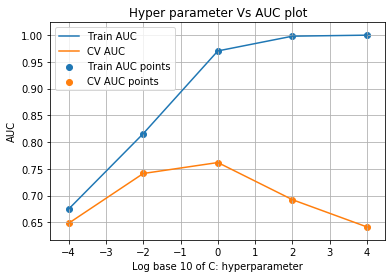

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.032980,0.008465,0.003799,0.000383,0.0001,{'C': 0.0001},0.677428,0.653326,0.650074,0.674546,0.620542,0.645081,0.655595,0.634494,0.628265,0.642857,0.648224,0.017383,4,0.673723,0.678702,0.678416,0.679567,0.672009,0.673687,0.675128,0.669440,0.671947,0.674446,0.674707,0.003134
1,0.062283,0.008532,0.004404,0.001068,0.01,{'C': 0.01},0.756567,0.749580,0.740868,0.745382,0.728314,0.745919,0.742775,0.753501,0.719295,0.729395,0.741163,0.011335,2,0.814709,0.815345,0.817967,0.817183,0.814867,0.813321,0.815974,0.813723,0.816966,0.816403,0.815646,0.001444
2,0.176470,0.006862,0.005767,0.003927,1,{'C': 1},0.770451,0.763129,0.764440,0.743819,0.766960,0.763763,0.749436,0.800938,0.737010,0.756304,0.761628,0.016632,1,0.969566,0.971348,0.971156,0.969463,0.969960,0.969813,0.970270,0.969526,0.971148,0.969964,0.970221,0.000692
3,0.699841,0.044925,0.004085,0.000218,100,{'C': 100},0.705495,0.683261,0.685679,0.688267,0.705214,0.670300,0.662498,0.727816,0.698034,0.695273,0.692183,0.017772,3,0.997671,0.998042,0.997921,0.997509,0.997861,0.997806,0.997788,0.997797,0.997808,0.997694,0.997790,0.000137
4,2.294282,0.370411,0.003994,0.000651,10000,{'C': 10000},0.647347,0.627929,0.637974,0.616755,0.661727,0.622658,0.601853,0.685356,0.660286,0.650522,0.641238,0.023530,5,0.999608,0.999738,0.999609,0.999610,0.999793,0.999702,0.999634,0.999791,0.999733,0.999755,0.999697,0.000072


In [21]:
results = pd.DataFrame.from_dict(model.cv_results_)
results = results.sort_values(['param_C'])

train_auc= results['mean_train_score']
train_auc_std= results['std_train_score']
cv_auc = results['mean_test_score'] 
cv_auc_std= results['std_test_score']
param_C =  results['param_C']

log_C = [(np.log(x)/np.log(10)) for x in param_C]

plt.plot(log_C, train_auc, label='Train AUC')

plt.plot(log_C, cv_auc, label='CV AUC')

plt.scatter(log_C, train_auc, label='Train AUC points')
plt.scatter(log_C, cv_auc, label='CV AUC points')


plt.legend()
plt.xlabel("Log base 10 of C: hyperparameter")
plt.ylabel("AUC")
plt.title("Hyper parameter Vs AUC plot")
plt.grid()
plt.show()

results.head()

In [22]:
model.best_estimator_

LogisticRegression(C=1, class_weight='balanced', dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

**Obervations:**

1. We can see both from the graph as well as from the API response that the best value of C = 1

2. This can be seen as value of 1 on the x-axis of the error vs logC plot.

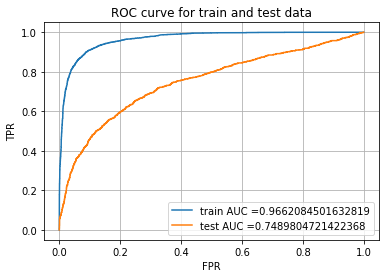

In [23]:
lr_bow = model.best_estimator_
lr_bow.fit(X_train_tweet_bow,Y_train)

y_train_pred = lr_bow.predict_proba(X_train_tweet_bow)
y_test_pred = lr_bow.predict_proba(X_test_tweet_bow)

# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs
train_fpr, train_tpr, tr_thresholds = roc_curve(Y_train.values, y_train_pred[:,1])
test_fpr, test_tpr, te_thresholds = roc_curve(Y_test.values, y_test_pred[:,1])

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()

plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC curve for train and test data")
plt.grid()
plt.show()

              precision    recall  f1-score   support

           0       0.80      0.79      0.79      2652
           1       0.59      0.61      0.60      1320

    accuracy                           0.73      3972
   macro avg       0.69      0.70      0.70      3972
weighted avg       0.73      0.73      0.73      3972



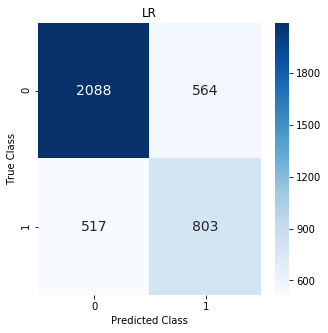

In [24]:

predicted_labels = lr_bow.predict(X_test_tweet_bow)


# y_pred_bool = [convert_prob_to_label(p) for p in y_pred]
print(classification_report(Y_test.values, predicted_labels))
results = confusion_matrix(Y_test.values, predicted_labels)
# print(classification_report(Y_test.values, y_pred_bool))
# results = confusion_matrix(Y_test.values, y_pred_bool)
plt.figure(figsize = (5,5))
ax = sns.heatmap(results, cmap="Blues", annot=True,annot_kws={"size": 14},fmt='g')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.title('LR')
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()

# results = confusion_matrix(Y_test, y_test_predict)
# plt.figure(figsize = (5,5))
# sns.heatmap(results, annot=True,annot_kws={"size": 14}, fmt='g')
# print("F1 Score = " + str(f1_score(Y_test,y_test_predict,average= 'macro') ))

In [0]:
from sklearn.metrics import classification_report
target_names = ['0', '1'] #0- not, 1- off
print(classification_report(Y_test, y_test_predict, target_names=target_names))

              precision    recall  f1-score   support

           0       0.80      0.79      0.80      2652
           1       0.59      0.61      0.60      1320

    accuracy                           0.73      3972
   macro avg       0.70      0.70      0.70      3972
weighted avg       0.73      0.73      0.73      3972



### Misclassified examples

In [0]:
y_test = np.asarray(Y_test)
misclassified = np.where(y_test != y_test_predict)

In [0]:
# print(type(misclassified))
print(len(misclassified[0]), 'misclassifications')

1068 misclassifications


In [0]:
def prRed(skk): print("\033[91m {}\033[00m" .format(skk)) 
def prGreen(skk): print("\033[92m {}\033[00m" .format(skk)) 

Red: original not offensive (0), classified as offensive (1) <br>
Green: original offensive (1), classified as not offensive (0)

In [0]:
#OFF=1, NOT=0)
for index in misclassified[0]:
  #original not offensive (0), classified as offensive (1) 
  if y_test[index] == 0 and y_test_predict[index] == 1:
    prRed(X_test.iloc[index,0])
  #original offensive (1), classified as not offensive (0)
  elif y_test[index] == 1 and y_test_predict[index] == 0:
    prGreen(X_test.iloc[index,0])

 @USER @USER It’s laughable that you parade China with its shocking human rights record. In China extreme Gun Control only meant death for millions of Chinese citizens at the hands of the state ... The History is well known.
 @USER @USER @USER @USER @USER You better pray hard because I will come in with him being guilty and he better prove he is innocent and if it's a child he can wrap it up prison is his destiny. Women can lie but 1 in a million lie about sexual assaults and rape
 *a shooting happens in a country with gun control laws for the first time in literally decades*  Y'all: BUT THE GUN LAWS SHOULD'VE PREVENTED THIS UNGA BUNGA THIS IS WHY GUN CONTROL SUCKS BET YOU DUMMIES WISH YOU HAD GUNS  *meanwhile another school shooting happens in America*
 @USER All we ever hear from Hillary is beeching &amp; moaning.  Dang ! That witch never get tired of complaining!
 @USER @USER What a waste of one’s short life.🤷🏻‍♂️🇺🇸
 @USER The comments below, defending Drug Ford's blatant abuse of p

## 2. TF-IDF


In [0]:
f1 = X_train_tweet_tfidf
f2 = X_train['user_mentions'].values.reshape(-1,1)
f3 = X_train['n_hash_tags'].values.reshape(-1,1)
f4 = X_train['n_urls'].values.reshape(-1,1)
f5 = X_train['n_emojis'].values.reshape(-1,1)

# print(type(f1))
X_train_tfidf =hstack((f1,f2,f3,f4))
X_train_tfidf.shape

(9268, 3761)

In [0]:
f1 = X_test_tweet_tfidf
f2 = X_test['user_mentions'].values.reshape(-1,1)
f3 = X_test['n_hash_tags'].values.reshape(-1,1)
f4 = X_test['n_urls'].values.reshape(-1,1)
f5 = X_test['n_emojis'].values.reshape(-1,1)

X_test_tfidf =hstack((f1,f2,f3,f4))
X_test_tfidf.shape

(3972, 3761)

## Hyperparameter Tuning

In [0]:
tune_parameters = [{'C': [10**-4, 10**-2, 10**0, 10**2, 10**4]}]

#Using GridSearchCV
model = GridSearchCV(LogisticRegression(class_weight='balanced'), tune_parameters, scoring = 'roc_auc', cv=10, return_train_score=True,n_jobs=-1, verbose=True)
model.fit(X_train_tfidf, Y_train)

Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   10.9s finished


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight='balanced',
                                          dual=False, fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid=[{'C': [0.0001, 0.01, 1, 100, 10000]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='roc_auc', verbose=True)

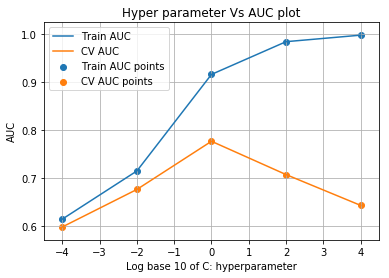

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.025596,0.004150,0.002823,0.000231,0.0001,{'C': 0.0001},0.603421,0.578148,0.577015,0.603159,0.586007,0.577854,0.615260,0.588756,0.607009,0.639863,0.597644,0.019117,5,0.613642,0.617373,0.617111,0.612854,0.615538,0.613917,0.611157,0.613993,0.613640,0.610341,0.613957,0.002155
1,0.038851,0.004997,0.003377,0.000615,0.01,{'C': 0.01},0.672065,0.663151,0.653861,0.692621,0.662377,0.670971,0.678443,0.685650,0.680203,0.698220,0.675753,0.013295,3,0.716553,0.715905,0.715020,0.716169,0.712514,0.713025,0.712093,0.711745,0.711635,0.717635,0.714229,0.002146
2,0.072943,0.014129,0.004278,0.003331,1,{'C': 1},0.776443,0.781508,0.767965,0.788901,0.758458,0.759064,0.772142,0.787060,0.780721,0.788005,0.776025,0.010769,1,0.914677,0.915101,0.915647,0.914216,0.917200,0.915269,0.915439,0.914576,0.915594,0.914951,0.915267,0.000779
3,0.221594,0.027017,0.003079,0.000225,100,{'C': 100},0.704606,0.716824,0.682977,0.733863,0.689473,0.693767,0.703069,0.728041,0.707926,0.706232,0.706678,0.015305,2,0.983441,0.982927,0.983122,0.982577,0.984854,0.983056,0.983747,0.982354,0.984062,0.983961,0.983410,0.000720
4,1.359425,0.366465,0.003020,0.000513,10000,{'C': 10000},0.634242,0.638630,0.636411,0.655626,0.625178,0.615981,0.663804,0.662634,0.647420,0.645500,0.642542,0.014794,4,0.998197,0.998157,0.995239,0.997447,0.998681,0.998399,0.994100,0.997716,0.996885,0.995030,0.996985,0.001538


In [0]:
results = pd.DataFrame.from_dict(model.cv_results_)
results = results.sort_values(['param_C'])

train_auc= results['mean_train_score']
train_auc_std= results['std_train_score']
cv_auc = results['mean_test_score'] 
cv_auc_std= results['std_test_score']
param_C =  results['param_C']

log_C = [(np.log(x)/np.log(10)) for x in param_C]

plt.plot(log_C, train_auc, label='Train AUC')

plt.plot(log_C, cv_auc, label='CV AUC')

plt.scatter(log_C, train_auc, label='Train AUC points')
plt.scatter(log_C, cv_auc, label='CV AUC points')


plt.legend()
plt.xlabel("Log base 10 of C: hyperparameter")
plt.ylabel("AUC")
plt.title("Hyper parameter Vs AUC plot")
plt.grid()
plt.show()

results.head()

In [0]:
model.best_estimator_

LogisticRegression(C=1, class_weight='balanced', dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

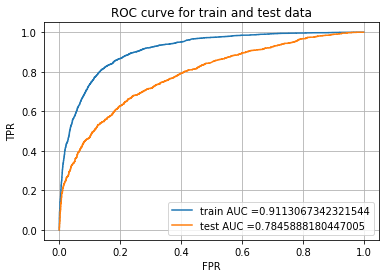

In [0]:
lr_tfidf = model.best_estimator_
lr_tfidf.fit(X_train_tfidf,Y_train)

y_train_pred = lr_tfidf.predict_proba(X_train_tfidf)
y_test_pred = lr_tfidf.predict_proba(X_test_tfidf)

# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs
train_fpr, train_tpr, tr_thresholds = roc_curve(Y_train, y_train_pred[:,1])
test_fpr, test_tpr, te_thresholds = roc_curve(Y_test, y_test_pred[:,1])

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()

plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC curve for train and test data")
plt.grid()
plt.show()

F1 Score = 0.7109478307733916


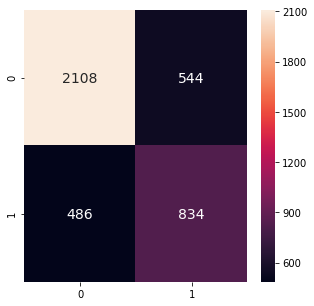

In [0]:
y_test_predict = lr_tfidf.predict(X_test_tfidf)

results = confusion_matrix(Y_test, y_test_predict)
plt.figure(figsize = (5,5))
sns.heatmap(results, annot=True,annot_kws={"size": 14}, fmt='g')
print("F1 Score = " + str(f1_score(Y_test,y_test_predict,average= 'macro') ))

In [0]:
print(classification_report(Y_test, y_test_predict, target_names=target_names))

              precision    recall  f1-score   support

           0       0.81      0.79      0.80      2652
           1       0.61      0.63      0.62      1320

    accuracy                           0.74      3972
   macro avg       0.71      0.71      0.71      3972
weighted avg       0.74      0.74      0.74      3972



### Misclassified examples

In [0]:
y_test = np.asarray(Y_test)
misclassified = np.where(y_test != y_test_predict)

In [0]:
# print(type(misclassified))
print(len(misclassified[0]), 'misclassifications')

1030 misclassifications


Red: original not offensive (0), classified as offensive (1) <br>
Green: original offensive (1), classified as not offensive (0)

In [0]:
#OFF=1, NOT=0)
for index in misclassified[0]:
  #original not offensive (0), classified as offensive (1) 
  if y_test[index] == 0 and y_test_predict[index] == 1:
    prRed(X_test.iloc[index,0])
  #original offensive (1), classified as not offensive (0)
  elif y_test[index] == 1 and y_test_predict[index] == 0:
    prGreen(X_test.iloc[index,0])

 @USER Hope he is enjoying himself while he can🤣
 @USER Boy they are really panicking why what do they have to hide I wat to know do t you  . I don’t recall republicans acting like this when obama put two liberals on the court
 @USER @USER @USER What part of NO COLLUSION don't you get??? This is why you are a dumocrat
 .@USER Just another Republican hater!  It amazes me that liberals don’t like Republican’s money 💰 Colin You’re fired! 😂😂#BoycottColinJost #EmmyAwards URL
 @USER @USER @USER @USER @USER @USER @USER @USER @USER @USER @USER @USER @USER @USER @USER @USER @USER @USER @USER @USER @USER @USER @USER @USER @USER @USER @USER @USER @USER @USER @USER @USER @USER @USER @USER @USER @USER @USER @USER @USER @USER @USER @USER @USER @USER @USER @USER @USER @USER They get testy and decide you're a paid shill" a lot, if you end up hanging around QAnon you'll get used to it."
 @USER @USER Can you name one Democratic leader who endorses open borders?  Second point syntactically nonsensical.  

# 3. AvgW2Vec 

In [0]:
f1 = X_train_tweet_avg_w2v_vectors
f2 = X_train['user_mentions'].values.reshape(-1,1)
f3 = X_train['n_hash_tags'].values.reshape(-1,1)
f4 = X_train['n_urls'].values.reshape(-1,1)
f5 = X_train['n_emojis'].values.reshape(-1,1)

X_train_w2vec =hstack((f1,f2,f3,f4,f5))
# X_train_w2vec.shape

In [0]:
f1 = X_test_tweet_avg_w2v_vectors
f2 = X_test['user_mentions'].values.reshape(-1,1)
f3 = X_test['n_hash_tags'].values.reshape(-1,1)
f4 = X_test['n_urls'].values.reshape(-1,1)
f5 = X_test['n_emojis'].values.reshape(-1,1)

X_test_w2vec =hstack((f1,f2,f3,f4,f5))

## Hyper parameter tuning

In [0]:
tune_parameters = [{'C': [10**-4, 10**-2, 10**0, 10**2, 10**4]}]

#Using GridSearchCV
model = GridSearchCV(LogisticRegression(class_weight='balanced'), tune_parameters, scoring = 'roc_auc', cv=10, return_train_score=True,n_jobs=-1, verbose=True)
model.fit(X_train_w2vec, Y_train)

NameError: ignored

In [0]:
results = pd.DataFrame.from_dict(model.cv_results_)
results = results.sort_values(['param_C'])

train_auc= results['mean_train_score']
train_auc_std= results['std_train_score']
cv_auc = results['mean_test_score'] 
cv_auc_std= results['std_test_score']
param_C =  results['param_C']

log_C = [(np.log(x)/np.log(10)) for x in param_C]

plt.plot(log_C, train_auc, label='Train AUC')

plt.plot(log_C, cv_auc, label='CV AUC')

plt.scatter(log_C, train_auc, label='Train AUC points')
plt.scatter(log_C, cv_auc, label='CV AUC points')


plt.legend()
plt.xlabel("Log base 10 of C: hyperparameter")
plt.ylabel("AUC")
plt.title("Hyper parameter Vs AUC plot")
plt.grid()
plt.show()

results.head()

AttributeError: ignored

In [0]:
model.best_estimator_

LogisticRegression(C=0.01, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

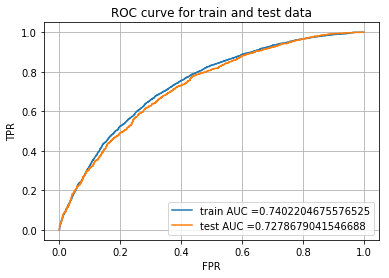

In [0]:
lr_w2vec = model.best_estimator_
lr_w2vec.fit(X_train_w2vec,Y_train)

y_train_pred = lr_w2vec.predict_proba(X_train_w2vec)
y_test_pred = lr_w2vec.predict_proba(X_test_w2vec)

# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs
train_fpr, train_tpr, tr_thresholds = roc_curve(Y_train, y_train_pred[:,1])
test_fpr, test_tpr, te_thresholds = roc_curve(Y_test, y_test_pred[:,1])

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()

plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC curve for train and test data")
plt.grid()
plt.show()

F1 Score = 0.649810149499686


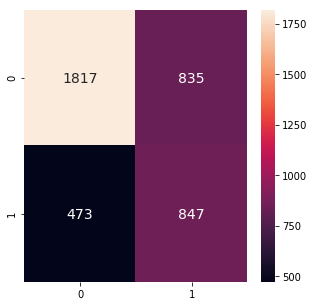

In [0]:
y_test_predict = lr_w2vec.predict(X_test_w2vec)

results = confusion_matrix(Y_test, y_test_predict)
plt.figure(figsize = (5,5))
sns.heatmap(results, annot=True,annot_kws={"size": 14}, fmt='g')
print("F1 Score = " + str(f1_score(Y_test,y_test_predict,average= 'macro') ))

In [0]:
print(classification_report(Y_test, y_test_predict, target_names=target_names))

              precision    recall  f1-score   support

           0       0.79      0.69      0.74      2652
           1       0.50      0.64      0.56      1320

    accuracy                           0.67      3972
   macro avg       0.65      0.66      0.65      3972
weighted avg       0.70      0.67      0.68      3972



### Misclassified examples

In [0]:
y_test = np.asarray(Y_test)
misclassified = np.where(y_test != y_test_predict)

In [0]:
# print(type(misclassified))
print(len(misclassified[0]), 'misclassifications')

1308 misclassifications


Red: original not offensive (0), classified as offensive (1) <br>
Green: original offensive (1), classified as not offensive (0)

In [0]:
#OFF=1, NOT=0)
for index in misclassified[0]:
  #original not offensive (0), classified as offensive (1) 
  if y_test[index] == 0 and y_test_predict[index] == 1:
    prRed(X_test.iloc[index,0])
  #original offensive (1), classified as not offensive (0)
  elif y_test[index] == 1 and y_test_predict[index] == 0:
    prGreen(X_test.iloc[index,0])

 @USER Colored people should vote! What color is she referring to? I’m white and bright! White is a color. Next racial dividing statement Ms Obama.
 @USER Again she is the GOAT at HER SPORT but of all athletes ever? Absolutely not
 @USER @USER You don’t understand who he is and is capablities. Despite the proof in the economy.  My hypothesis is that you have been lied to by liberals your entire life and are believing what you are told. The liberal media made bill Clinton look good and could do the same with trump.
 @USER the owner of my culo
 @USER but if you go on a date first..and then have sex...it’s the best of both worlds. and the sex is better.
 @USER Hi sexy
 @USER @USER @USER If so why do Democrats continue to say he is a rapist? Why do you Democrats say Republicans allow a rapist to be president?  He isnt unscathed.
 @USER Mon « bye bitches » suffisait
 @USER @USER But the liberals do
 @USER Hmmmm.  I think they should’ve held on to him a bit longer.  We might see his face and